<a href="https://colab.research.google.com/github/ci5co150/CSCI191T/blob/main/LinearAndLogisticNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linera Regression 

By Francisco Gomez

Csci191T Fall 2021


**What is Linear Regression**

Linear regression is used to predict an outcome variable, or dependent variable. By using a set of independet variables.

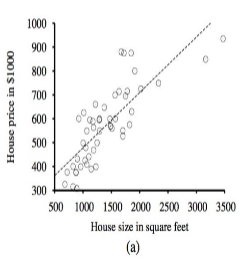

**Elements of linear regresion** 

1. A function eg: 
    - cointaing weights

    - hw(X) = W1x+ w0


 2. Empirical Loss = ZUM((yj - hw(xj))^2) from 1 to N

 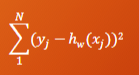
    

  3. Gradient Descent

     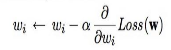

  and where alpha is the lenght of steps

   4. update rule using calculus

   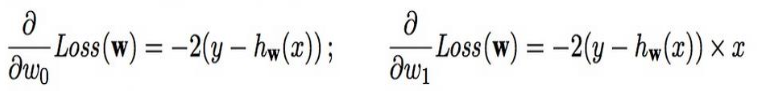


  5. Model update
  
     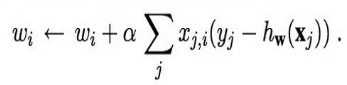


**Class Assignment**

In [20]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [21]:
data = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
X = [d for d,_ in data]
Y = [y for _, y in data]
print(data)
alpha=0.01
model=[0, 0]
Errors = []
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
dataX1 = [x[1] for x, y in data]
print(dataX1)


[((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Iteration:  1
With Model= [0.26, 1.6] Error= 2925.0
this is y: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
this is yPredicted: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


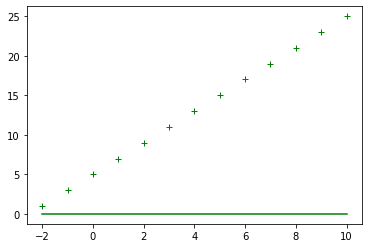

Iteration:  100
With Model= [3.1680758214146314, 2.2480466356837114] Error= 20.74361313424352
this is y: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
this is yPredicted: [-1.3495577747558771, 0.9007839490076286, 3.1511256727711343, 5.40146739653464, 7.651809120298146, 9.902150844061651, 12.152492567825156, 14.402834291588661, 16.65317601535217, 18.903517739115674, 21.15385946287918, 23.404201186642684, 25.65454291040619]


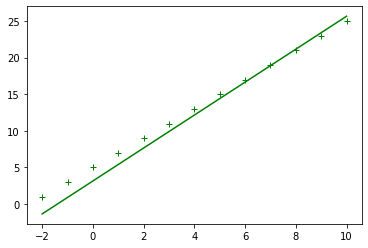

Iteration:  200
With Model= [4.270680607367308, 2.0987514787981696] Error= 3.2877965705910857
this is y: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
this is yPredicted: [0.06460208928318245, 2.164267280703283, 4.2639324721233836, 6.363597663543484, 8.463262854963585, 10.562928046383686, 12.662593237803787, 14.762258429223888, 16.861923620643985, 18.961588812064086, 21.061254003484187, 23.160919194904288, 25.26058438632439]


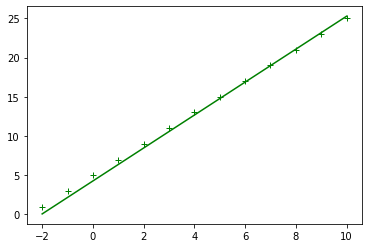

Iteration:  300
With Model= [4.706959311611814, 2.039678365361856] Error= 0.5307930975034508
this is y: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
this is yPredicted: [0.6241569188447764, 2.6642024141341025, 4.704247909423429, 6.744293404712755, 8.78433890000208, 10.824384395291407, 12.864429890580734, 14.904475385870061, 16.944520881159384, 18.98456637644871, 21.02461187173804, 23.064657367027365, 25.104702862316692]


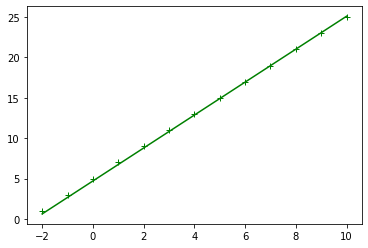

In [22]:
# Evaluate Model
def linearRegression(d, model, a, j, Y):
  for i in range(j):
    yPredicted = [F(model, x) for x in X]
    Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
    Errors.append([model, Error])
    #print("Iterations=",i+1,":=",Errors[i])
    deltaX0 = 1/len(Y)*sum( [(-2*((r-y))*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
    deltaX1 = 1/len(Y)*sum( [(-2*((r-y))*x[1]) for r,y,x in zip(Y, yPredicted, X)] )
    model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]

    if(i%100 == 0 or (i+1) == j):
      if (i == 0 or (i+1) == j):
        h = i + 1
        print("Iteration: ", h)
      else:
        print("Iteration: ", i)
      print("With Model=", model, "Error=", Error)
      plt.plot(dataX1, yPredicted, "g")
      plt.plot(dataX1, Y, "g+")
      print("this is y:",Y)
      print("this is yPredicted:",yPredicted)
      plt.show()

linearRegression(data, model, alpha, 300 , Y)

**Reset the model to test the Training Data 2 with Noise**

[((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]


[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[6.39, 16.51, -3.11, 10.79, 11.62, 23.24, 18.27, 27.58, 22.21, 5.12, 8.86, 10.69, 14.82]
Iteration:  1
With Model= [0.2661384615384616, 1.184353846153846] Error= 3140.9862999999996
this is y: [6.39, 16.51, -3.11, 10.79, 11.62, 23.24, 18.27, 27.58, 22.21, 5.12, 8.86, 10.69, 14.82]
this is yPredicted: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


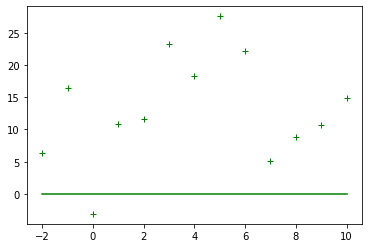

Iteration:  100
With Model= [7.126248494158175, 1.0330030599828628] Error= 929.1677572579672
this is y: [6.39, 16.51, -3.11, 10.79, 11.62, 23.24, 18.27, 27.58, 22.21, 5.12, 8.86, 10.69, 14.82]
this is yPredicted: [5.0076916126301345, 6.046293874461083, 7.08489613629203, 8.123498398122978, 9.162100659953925, 10.200702921784872, 11.23930518361582, 12.277907445446766, 13.316509707277714, 14.355111969108663, 15.393714230939608, 16.432316492770557, 17.470918754601502]


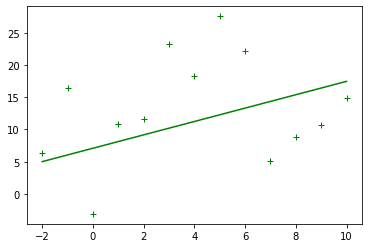

Iteration:  200
With Model= [9.816213558926659, 0.668775767051019] Error= 825.2729833173107
this is y: [6.39, 16.51, -3.11, 10.79, 11.62, 23.24, 18.27, 27.58, 22.21, 5.12, 8.86, 10.69, 14.82]
this is yPredicted: [8.457740695245027, 9.128745597398256, 9.799750499551486, 10.470755401704716, 11.141760303857945, 11.812765206011175, 12.483770108164405, 13.154775010317636, 13.825779912470864, 14.496784814624094, 15.167789716777325, 15.838794618930553, 16.509799521083785]


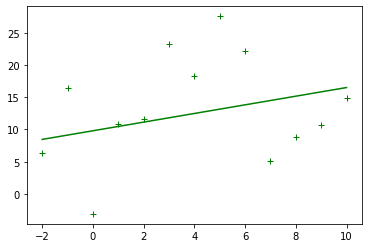

Iteration:  300
With Model= [10.880579039533737, 0.5246582977317727] Error= 808.8636534217112
this is y: [6.39, 16.51, -3.11, 10.79, 11.62, 23.24, 18.27, 27.58, 22.21, 5.12, 8.86, 10.69, 14.82]
this is yPredicted: [9.822856249357791, 10.348410214051748, 10.873964178745707, 11.399518143439666, 11.925072108133623, 12.450626072827582, 12.976180037521539, 13.501734002215498, 14.027287966909455, 14.552841931603414, 15.078395896297373, 15.60394986099133, 16.129503825685287]


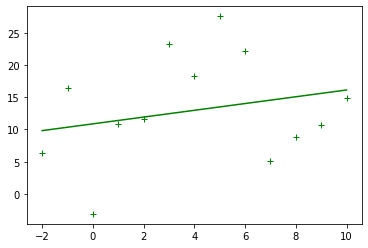

In [23]:
data2 = [((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]
X = [d for d,_ in data2]
Y = [y for _, y in data2]
dataX1 = [x[1] for x, y in data2]
print(X)
print(Y)
model=[0, 0]
linearRegression(data2, model, alpha, 300, Y)